In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
signal = pd.read_excel("secom.xlsx")
label = pd.read_excel("secom_labels.xlsx")
secom = pd.concat([signal, label], axis = 1)
secom = secom.drop('date', axis=1)

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
secom_std_0 = []
for name, std in zip(signal, secom.describe().loc['std']):
    if std == 0:
        secom_std_0.append(name)
secom = secom.drop(secom_std_0,axis=1)
secom_missing = (secom.isnull().sum() / len(secom)).sort_values(ascending = False)

secom_missing_remove = secom_missing.index[secom_missing > 0.63]
secom = secom.drop(secom_missing_remove ,axis = 1)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
secom_impute = imputer.fit_transform(secom)
secom_impute = pd.DataFrame(secom_impute)
secom_impute.columns = list(secom)
X = secom_impute.drop('test', axis=1)
y = secom['test']

In [2]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42,class_weight='balanced')
rnd_clf.fit(X,y)
secom_feature_names = list(secom_impute)
rnd_forest_feature_importance = []
for name, score in zip(secom_feature_names, rnd_clf.feature_importances_):
    rnd_forest_feature_importance.append([name,score])
d = sorted(rnd_forest_feature_importance, key=lambda x : -x[1])
d_=pd.DataFrame(d)
d_['cumulative_importance']=np.cumsum(d_[1])
d_.columns = ['signal','rf_importance','cumulative_importance']
d_

,signal,rf_importance,cumulative_importance
0,signal60,2.128748e-02,0.021287
1,signal34,1.158753e-02,0.032875
2,signal520,1.098705e-02,0.043862
3,signal131,1.065821e-02,0.054520
4,signal104,1.060899e-02,0.065129
5,signal248,1.038502e-02,0.075514
6,signal65,9.284544e-03,0.084799
7,signal59,8.078362e-03,0.092877
8,signal22,6.676086e-03,0.099553
9,signal349,6.293850e-03,0.105847


In [3]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X,y)
secom_feature_names = list(secom_impute)
gbm_feature_importance = []
for name, score in zip(secom_feature_names, gbm.feature_importances_):
    gbm_feature_importance.append([name,score])
d2 = sorted(gbm_feature_importance, key=lambda x : -x[1])
d2_ = pd.DataFrame(d2)
d2_['cumulative_importance']=np.cumsum(d2_[1])
d2_.columns = ['signal', 'gbm_importance', 'cumulative_importance']
d2_

,signal,gbm_importance,cumulative_importance
0,signal60,5.704086e-02,0.057041
1,signal65,5.258798e-02,0.109629
2,signal427,3.445340e-02,0.144082
3,signal334,2.584892e-02,0.169931
4,signal442,2.196453e-02,0.191896
5,signal542,1.959965e-02,0.211495
6,signal563,1.909302e-02,0.230588
7,signal3,1.707254e-02,0.247661
8,signal17,1.572813e-02,0.263389
9,signal349,1.562841e-02,0.279017


In [4]:
cor_list = []
for i in X.columns.tolist():
    cor = np.corrcoef(X[i], y)[0, 1]
    cor_list.append([i,cor])
d3 = sorted(cor_list, key=lambda x :- abs(x[1]))
d3_ = pd.DataFrame(d3)
d3_.columns = ['signal','corr']
d3_

,signal,corr
0,signal60,0.155532
1,signal104,0.150879
2,signal511,0.131335
3,signal349,0.129725
4,signal432,0.119781
5,signal435,0.111289
6,signal431,0.109450
7,signal29,-0.109217
8,signal436,0.108236
9,signal22,0.106876


In [5]:
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
auc_lasso = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_norm, y)
    pred = lasso.predict(X)
    auc_lasso.append(roc_auc_score(y,pred))
auc_lasso

C:\Users\mstar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7930917413100929, tolerance: 0.03883905552010211
  model = cd_fast.enet_coordinate_descent(


[0.5,
 0.5,
 0.5,
 0.5,
 0.6197158105052842,
 0.6776052894473947,
 0.5531836584468164]

In [6]:
lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(X_norm, y)
lasso_pred_001 = lasso_001.predict(X_norm)
lasso_feature_weight = []
for name, weight in zip(secom_feature_names, lasso_001.coef_):
    lasso_feature_weight.append([name,weight])
d4 = sorted(lasso_feature_weight, key=lambda x :- abs(x[1]))
d4_ = pd.DataFrame(d4)
d4_.columns = ['signal','coef_weights']
d4_

,signal,coef_weights
0,signal60,1.121831
1,signal349,0.501068
2,signal65,0.344917
3,signal438,0.322669
4,signal511,0.285707
5,signal76,0.264973
6,signal130,0.246233
7,signal432,0.209047
8,signal563,-0.180147
9,signal34,0.179167


In [7]:
d_TF = (d_['cumulative_importance'] <= 0.45)
d_signal = d_['signal']
d_rndf_signal_TF = pd.concat([d_signal, d_TF], axis=1)
d_rndf_signal_TF.columns = ['signal','rndf_importance']
d2_TF = (d2_['cumulative_importance'] <= 0.86)
d_gbrf_signal = d2_['signal']
d_gbrf_signal_TF = pd.concat([d_gbrf_signal, d2_TF], axis=1)
d_gbrf_signal_TF.columns = ['signal','gbm_importance']
d3_TF = (abs(d3_['corr']) >= 0.045)
d_corr_signal = d3_['signal']
d_corr_signal_TF = pd.concat([d_corr_signal, d3_TF], axis=1)
d_corr_signal_TF.columns = ['signal','correlation']
d_lasso_signal = d4_['signal']
d_lasso_T = abs(d4_['coef_weights'])>0
d_lasso_signal_TF = pd.concat([d_lasso_signal, d_lasso_T], axis=1)

In [8]:
corr_lasso = pd.merge(d_corr_signal_TF,d_lasso_signal_TF, on='signal')
rndf_gbrt = pd.merge(d_rndf_signal_TF,d_gbrf_signal_TF, on='signal')
feature_selection = pd.merge(corr_lasso,rndf_gbrt,on='signal')
feature_selection['Total'] = np.sum(feature_selection, axis=1)
feature_selection = feature_selection.sort_values(['Total','signal'] , ascending=False)
feature_selection.index = range(1, len(feature_selection)+1)
feature_selection

,signal,correlation,coef_weights,rndf_importance,gbm_importance,Total
1,signal65,True,True,True,True,4
2,signal60,True,True,True,True,4
3,signal59,True,True,True,True,4
4,signal461,True,True,True,True,4
5,signal41,True,True,True,True,4
6,signal349,True,True,True,True,4
7,signal34,True,True,True,True,4
8,signal15,True,True,True,True,4
9,signal131,True,True,True,True,4
10,signal122,True,True,True,True,4


In [9]:
selected_feature = feature_selection[feature_selection['Total']>=3]
#selected_feature.columns = ['signal','Pearson Correlation','Auc Score','Rndf','GBM','Lasso','Total']
selected_feature.columns = ['signal','Pearson Correlation','Rndf','GBM','Lasso','Total']
selected_feature

,signal,Pearson Correlation,Rndf,GBM,Lasso,Total
1,signal65,True,True,True,True,4
2,signal60,True,True,True,True,4
3,signal59,True,True,True,True,4
4,signal461,True,True,True,True,4
5,signal41,True,True,True,True,4
6,signal349,True,True,True,True,4
7,signal34,True,True,True,True,4
8,signal15,True,True,True,True,4
9,signal131,True,True,True,True,4
10,signal122,True,True,True,True,4


In [10]:
selected_feature_list = list(selected_feature['signal'])
X_selected_feature = X[selected_feature_list]

In [11]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X_selected_feature)
X_std = pd.DataFrame(x_std,columns=X_selected_feature.columns)
X_std

,signal65,signal60,signal59,signal461,signal41,signal349,signal34,signal15,signal131,signal122,signal104,signal82,signal77,signal576,signal572,signal563,signal511,signal478,signal469,signal438,signal434,signal432,signal366,signal342,signal334,signal320,signal32,signal317,signal29,signal23,signal22,signal211,signal164,signal130,signal127,signal125,signal123,signal116,signal115,signal101,signal100
0,0.236986,-0.493495,1.322946,0.055621,-0.279222,-0.271990,0.411189,-0.376853,-0.252524,0.841946,1.823863,-2.101003,0.262941,-0.031418,0.034410,-0.565565,0.235668,-0.043799,0.381625,-0.561912,-0.692891,0.297216,4.447654,0.033310,0.110109,-1.167710,-0.288811,0.287807,-1.522047,0.734765,0.319154,-0.278967,-0.411467,0.415289,2.382304,1.189102,-1.395747,0.025089,-0.073477,0.622245,-0.423549
1,-0.273162,-0.227091,1.043995,0.844120,0.429511,-0.890822,0.624867,0.410162,0.815633,0.841946,1.725913,-0.979146,0.287167,-0.406218,1.205944,-1.430317,2.273731,-0.044783,1.040142,-0.498777,-0.024597,-0.552328,0.038495,-0.083445,-0.085598,-1.227032,-0.479465,-0.318873,-0.311141,-0.322780,0.283235,-0.770865,-0.230965,0.376444,0.079469,0.750067,-1.504442,-0.329673,-0.073477,-1.068607,-0.275066
2,-0.880660,2.193037,-0.070631,0.237211,-2.239938,-1.204476,-0.224113,0.181430,0.903127,1.043206,2.346265,0.172233,-0.100448,-0.600996,-0.263745,0.589226,4.911124,0.281705,-0.878836,-0.552911,-0.424424,0.187487,0.076180,0.282285,-0.079532,-0.797634,-0.140213,-0.247655,-0.683729,0.007438,0.273257,-1.312907,0.384382,0.298753,1.357503,1.364716,-1.126229,-0.588677,-0.073477,1.749480,1.921848
3,-0.992326,2.251350,-0.070631,-0.113738,0.373096,1.355622,-0.209302,0.213462,-0.251309,-2.478851,1.268811,1.412180,-0.509260,-0.770689,-0.278290,0.753752,1.533616,0.021186,-0.866163,-0.817868,-0.106690,-0.245971,-0.225301,0.079159,0.120976,-0.727292,-0.546381,-0.523392,-1.897844,-0.173759,0.240531,0.857650,-0.591969,0.687208,-1.071948,-1.796336,-0.848946,-0.782633,-0.073477,-0.504990,-0.334140
4,2.364819,-1.604670,0.566130,0.127132,0.351784,-0.009198,-0.143212,0.557365,0.400036,-0.466247,1.725913,0.520599,1.440926,-0.503607,-0.270290,-0.817254,2.449746,-0.006042,-0.776646,1.358407,-0.910069,-0.319293,0.415346,0.098559,-0.438026,1.442381,-0.749184,-1.062096,-1.926751,-0.217788,0.227760,0.062496,0.056197,-0.012093,1.092400,-0.742652,-0.831200,1.005673,-0.073477,1.185862,-0.289435
5,-1.780873,2.663138,0.402526,1.022604,-0.335637,-0.687370,0.512260,-0.124214,0.815633,0.841946,1.497362,0.591453,-0.778773,-0.218818,0.806343,-1.256462,0.343574,0.221897,-0.870169,-0.802969,1.736604,0.232645,1.621270,0.270782,0.202280,1.038190,-0.287129,-0.379875,-2.058425,0.860926,-0.700956,-0.582224,-0.616582,0.376444,0.079469,0.750067,-1.504442,0.014405,-0.073477,-0.504990,-0.691777
6,-0.535635,-0.090024,1.043995,-0.413099,0.271132,-0.594122,0.141468,0.009389,0.167934,0.338795,1.823863,-0.412313,0.487030,-0.664446,1.167402,-0.155098,2.753932,0.250168,-0.266027,0.568315,-0.478509,0.042320,0.377661,0.395761,-0.175943,-1.261928,-0.338157,-1.041860,-2.514527,-0.026430,-0.854212,-0.680126,-0.509922,0.065598,0.407880,0.398839,-1.466732,1.203459,-0.073477,1.185862,0.898431
7,-1.949077,2.750975,0.402526,-1.519457,0.422824,-0.263513,-0.172089,1.674397,0.500898,-0.164356,1.334112,1.270472,-0.912016,0.313870,0.359836,0.310211,0.619308,0.552685,-0.901251,-0.742193,-0.424764,-0.241731,1.395159,0.607904,0.145005,1.375574,-0.401521,-1.149522,-0.635541,-0.500590,0.356670,-0.448505,0.171061,1.036899,-0.419082,0.047611,-1.805017,0.632483,-0.073477,0.904054,-0.185657
8,-1.515823,2.524726,0.402526,0.632605,-0.287162,-1.221431,0.493653,1.315248,0.500898,-0.164356,1.627962,-0.235178,-0.697011,-0.249805,0.418740,0.323497,2.197965,-0.127135,-0.889684,-0.122324,-0.235381,3.257894,0.942938,0.013500,-0.303068,0.607782,-0.311989,-1.566221,-1.936378,-2.167770,2.270774,-1.124267,6.332733,1.036899,-0.419082,0.047611,-1.805017,0.024098,-0.073477,0.340436,1.240102
9,-1.784155,2.664851,0.402526,-0.528499,0.422824,0.592679,-0.172089,1.223

In [97]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10,random_state=1,shuffle=True)
idx = []
for train_idx, test_idx in kfold.split(X_std):
    idx.append([train_idx,test_idx])

In [98]:
X_train_1 = X_std.loc[idx[0][0]]
X_test_1 = X_std.loc[idx[0][1]]
y_train_1 = y.loc[idx[0][0]]
y_test_1 = y.loc[idx[0][1]]
X_train_2 = X_std.loc[idx[1][0]]
X_test_2 = X_std.loc[idx[1][1]]
y_train_2 = y.loc[idx[1][0]]
y_test_2 = y.loc[idx[1][1]]
X_train_3 = X_std.loc[idx[2][0]]
X_test_3 = X_std.loc[idx[2][1]]
y_train_3 = y.loc[idx[2][0]]
y_test_3 = y.loc[idx[2][1]]
X_train_4 = X_std.loc[idx[3][0]]
X_test_4 = X_std.loc[idx[3][1]]
y_train_4 = y.loc[idx[3][0]]
y_test_4 = y.loc[idx[3][1]]
X_train_5 = X_std.loc[idx[4][0]]
X_test_5 = X_std.loc[idx[4][1]]
y_train_5 = y.loc[idx[4][0]]
y_test_5 = y.loc[idx[4][1]]
X_train_6 = X_std.loc[idx[5][0]]
X_test_6 = X_std.loc[idx[5][1]]
y_train_6 = y.loc[idx[5][0]]
y_test_6 = y.loc[idx[5][1]]
X_train_7 = X_std.loc[idx[6][0]]
X_test_7 = X_std.loc[idx[6][1]]
y_train_7 = y.loc[idx[6][0]]
y_test_7 = y.loc[idx[6][1]]
X_train_8 = X_std.loc[idx[7][0]]
X_test_8 = X_std.loc[idx[7][1]]
y_train_8 = y.loc[idx[7][0]]
y_test_8 = y.loc[idx[7][1]]
X_train_9 = X_std.loc[idx[8][0]]
X_test_9 = X_std.loc[idx[8][1]]
y_train_9 = y.loc[idx[8][0]]
y_test_9 = y.loc[idx[8][1]]
X_train_10 = X_std.loc[idx[9][0]]
X_test_10 = X_std.loc[idx[9][1]]
y_train_10 = y.loc[idx[9][0]]
y_test_10 = y.loc[idx[9][1]]
a = []
a.append(y_test_1.value_counts())
a.append(y_test_2.value_counts())
a.append(y_test_3.value_counts())
a.append(y_test_4.value_counts())
a.append(y_test_5.value_counts())
a.append(y_test_6.value_counts())
a.append(y_test_7.value_counts())
a.append(y_test_8.value_counts())
a.append(y_test_9.value_counts())
a.append(y_test_10.value_counts())
a = pd.DataFrame(a)
a.index = ['1','2','3','4','5','6','7','8','9','10']
a

,-1,1
1,145,12
2,149,8
3,145,12
4,147,10
5,145,12
6,143,14
7,146,11
8,147,9
9,148,8
10,148,8


In [99]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
lr_accuracy = []
lr_auc = []
lr_f1 = []

for train_idx, test_idx in kfold.split(X_std):
    X_train = X_std.iloc[train_idx]
    X_test = X_std.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    X_train, y_train = ADASYN(random_state=4).fit_resample(X_train, y_train)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_predict = lr.predict(X_test)
    lr_accuracy.append(accuracy_score(y_test, lr_predict))
    lr_auc.append(roc_auc_score(y_test,lr_predict))
    lr_f1.append(f1_score(y_test,lr_predict))

In [100]:
lr_dict = {'lr_acc':lr_accuracy,'lr_auc':lr_auc,'lr_f1':lr_f1}
lr_df = pd.DataFrame(lr_dict)
lr_df

,lr_acc,lr_auc,lr_f1
0,0.757962,0.639655,0.240000
1,0.738854,0.684983,0.196078
2,0.764331,0.681322,0.274510
3,0.732484,0.717347,0.250000
4,0.707006,0.612069,0.206897
5,0.783439,0.720030,0.346154
6,0.681529,0.576588,0.166667
7,0.711538,0.534014,0.117647
8,0.730769,0.739865,0.222222
9,0.775641,0.763514,0.255319


In [101]:
lr_score = pd.DataFrame(np.array(lr_df.mean()).reshape(-1,1),columns=['LogisticRegression'])
lr_score

,LogisticRegression
0,0.738355
1,0.666939
2,0.227549


In [102]:
from sklearn.tree import DecisionTreeClassifier
dt_accuracy = []
dt_auc = []
dt_f1 = []

for train_idx, test_idx in kfold.split(X_std):
    X_train = X_std.iloc[train_idx]
    X_test = X_std.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    X_train, y_train = ADASYN(random_state=4).fit_resample(X_train, y_train)
    dt = DecisionTreeClassifier(random_state=5)
    dt.fit(X_train, y_train)
    dt_predict = dt.predict(X_test)
    dt_accuracy.append(accuracy_score(y_test, dt_predict))
    dt_auc.append(roc_auc_score(y_test,dt_predict))
    dt_f1.append(f1_score(y_test,dt_predict))

In [103]:
dt_dict = {'dt_acc':dt_accuracy,'dt_auc':dt_auc,'dt_f1':dt_f1}
dt_df = pd.DataFrame(dt_dict)
dt_df

,dt_acc,dt_auc,dt_f1
0,0.859873,0.618391,0.266667
1,0.859873,0.630453,0.214286
2,0.808917,0.590805,0.210526
3,0.885350,0.705782,0.357143
4,0.821656,0.597701,0.222222
5,0.885350,0.647103,0.357143
6,0.834395,0.490660,0.071429
7,0.826923,0.543084,0.129032
8,0.897436,0.591216,0.200000
9,0.839744,0.560811,0.137931


In [104]:
dt_score = pd.DataFrame(np.array(dt_df.mean()).reshape(-1,1),columns=['DecisionTree'])
dt_score

,DecisionTree
0,0.851952
1,0.597601
2,0.216638


In [105]:
rf_accuracy = []
rf_auc = []
rf_f1 = []

for train_idx, test_idx in kfold.split(X_std):
    X_train = X_std.iloc[train_idx]
    X_test = X_std.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    X_train, y_train = ADASYN(random_state=4).fit_resample(X_train, y_train)
    rf = RandomForestClassifier(random_state=3)
    rf.fit(X_train, y_train)
    rf_predict = rf.predict(X_test)
    rf_accuracy.append(accuracy_score(y_test, rf_predict))
    rf_auc.append(roc_auc_score(y_test,rf_predict))
    rf_f1.append(f1_score(y_test,rf_predict))

In [106]:
rf_dict = {'rf_acc':rf_accuracy,'rf_auc':rf_auc,'rf_f1':rf_f1}
rf_df = pd.DataFrame(rf_dict)
rf_df

,rf_acc,rf_auc,rf_f1
0,0.923567,0.576437,0.250000
1,0.942675,0.614933,0.307692
2,0.904459,0.604310,0.285714
3,0.955414,0.650000,0.461538
4,0.910828,0.569540,0.222222
5,0.910828,0.564436,0.222222
6,0.910828,0.531756,0.125000
7,0.910256,0.482993,0.000000
8,0.923077,0.486486,0.000000
9,0.929487,0.667230,0.352941


In [107]:
rf_score = pd.DataFrame(np.array(rf_df.mean()).reshape(-1,1),columns=['RandomForest'])
rf_score

,RandomForest
0,0.922142
1,0.574812
2,0.222733


In [108]:
from sklearn.ensemble import AdaBoostClassifier
bt_accuracy = []
bt_auc = []
bt_f1 = []

for train_idx, test_idx in kfold.split(X_std):
    X_train = X_std.iloc[train_idx]
    X_test = X_std.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    X_train, y_train = ADASYN(random_state=4).fit_resample(X_train, y_train)
    bt = AdaBoostClassifier(random_state=1)
    bt.fit(X_train, y_train)
    bt_predict = bt.predict(X_test)
    bt_accuracy.append(accuracy_score(y_test, bt_predict))
    bt_auc.append(roc_auc_score(y_test,bt_predict))
    bt_f1.append(f1_score(y_test,bt_predict))

In [109]:
bt_dict = {'bt_acc':bt_accuracy,'bt_auc':bt_auc,'bt_f1':bt_f1}
bt_df = pd.DataFrame(bt_dict)
bt_df

,bt_acc,bt_auc,bt_f1
0,0.834395,0.681034,0.315789
1,0.840764,0.679530,0.242424
2,0.853503,0.691379,0.342857
3,0.834395,0.771769,0.350000
4,0.783439,0.615230,0.227273
5,0.821656,0.644356,0.300000
6,0.777070,0.417808,0.000000
7,0.788462,0.574830,0.153846
8,0.858974,0.630068,0.214286
9,0.814103,0.665541,0.216216


In [110]:
bt_score = pd.DataFrame(np.array(bt_df.mean()).reshape(-1,1),columns=['boosting'])
bt_score

,boosting
0,0.820676
1,0.637154
2,0.236269


In [111]:
score = pd.concat([lr_score,dt_score,rf_score,bt_score],axis=1)

In [112]:
score.index=['accuracy','auc_score','f1_score']

In [113]:
score

,LogisticRegression,DecisionTree,RandomForest,boosting
accuracy,0.738355,0.851952,0.922142,0.820676
auc_score,0.666939,0.597601,0.574812,0.637154
f1_score,0.227549,0.216638,0.222733,0.236269


In [114]:
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distribs = {"C":[0.000001,0.000002,0.000005,0.00001,0.00002,0.00005,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50]
                 }
lr = LogisticRegression()
lr_search = RandomizedSearchCV(lr, param_distributions=param_distribs, n_iter=10, cv=kfold, scoring='roc_auc')
lr_search.fit(X_std,y)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [1e-06, 2e-06, 5e-06, 1e-05, 2e-05,
                                              5e-05, 0.0001, 0.0002, 0.0005,
                                              0.001, 0.002, 0.005, 0.01, 0.02,
                                              0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10,
                                              20, 50]},
                   scoring='roc_auc')

In [116]:
print('final params', lr_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', lr_search.best_score_)

final params {'C': 2e-05}
best score 0.7819079486341811


In [117]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
lr_accuracy = []
lr_auc = []
lr_f1 = []

for train_idx, test_idx in kfold.split(X_std):
    X_train = X_std.iloc[train_idx]
    X_test = X_std.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    X_train, y_train = ADASYN(random_state=4).fit_resample(X_train, y_train)
    lr = LogisticRegression(C=0.0001)
    lr.fit(X_train, y_train)
    lr_predict = lr.predict(X_test)
    lr_accuracy.append(accuracy_score(y_test, lr_predict))
    lr_auc.append(roc_auc_score(y_test,lr_predict))
    lr_f1.append(f1_score(y_test,lr_predict))

In [118]:
lr_dict = {'lr_acc':lr_accuracy,'lr_auc':lr_auc,'lr_f1':lr_f1}
lr_df = pd.DataFrame(lr_dict)
lr_df

,lr_acc,lr_auc,lr_f1
0,0.777070,0.650000,0.255319
1,0.719745,0.734060,0.214286
2,0.789809,0.733333,0.326531
3,0.808917,0.851361,0.375000
4,0.757962,0.716092,0.296296
5,0.789809,0.691309,0.326531
6,0.719745,0.555106,0.153846
7,0.737179,0.599773,0.163265
8,0.782051,0.766892,0.260870
9,0.775641,0.822635,0.285714


In [119]:
lr_score = pd.DataFrame(np.array(lr_df.mean()).reshape(-1,1),columns=['LogisticRegression'])
lr_score

,LogisticRegression
0,0.765793
1,0.712056
2,0.265766


In [120]:
print(lr.get_params())

{'C': 0.0001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [121]:
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 5, 'splitter': 'best'}


In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distribs = {"criterion": ['gini','entropy'], 
                  "max_depth": sp_randint(1, 100),
                  "max_features": sp_randint(1, 100),
                  "max_leaf_nodes": sp_randint(1, 100),
                  "min_samples_split": sp_randint(1, 100),
                  "min_samples_leaf": sp_randint(1, 100),
                 }
dt = DecisionTreeClassifier(random_state=5)
dt_search = RandomizedSearchCV(dt, param_distributions=param_distribs, n_iter=10, cv=kfold, scoring='roc_auc')
dt_search.fit(X_std,y)

C:\Users\mstar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mstar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mstar\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\mstar\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\mstar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=5),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C63BCF4730>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C63BA44BB0>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C63BE5B490>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C63BCF4490>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C63BA44DF0>},
                   scoring='roc_auc')

In [123]:
print('final params', dt_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', dt_search.best_score_)

final params {'criterion': 'entropy', 'max_depth': 75, 'max_features': 30, 'max_leaf_nodes': 49, 'min_samples_leaf': 80, 'min_samples_split': 37}
best score 0.6828850792579213


In [143]:
from sklearn.tree import DecisionTreeClassifier
dt_accuracy = []
dt_auc = []
dt_f1 = []

for train_idx, test_idx in kfold.split(X_std):
    X_train = X_std.iloc[train_idx]
    X_test = X_std.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    X_train, y_train = ADASYN(random_state=4).fit_resample(X_train, y_train)
    dt = dt_search.best_estimator_
    dt.fit(X_train, y_train)
    dt_predict = dt.predict(X_test)
    dt_accuracy.append(accuracy_score(y_test, dt_predict))
    dt_auc.append(roc_auc_score(y_test,dt_predict))
    dt_f1.append(f1_score(y_test,dt_predict))

In [144]:
dt_dict = {'dt_acc':dt_accuracy,'dt_auc':dt_auc,'dt_f1':dt_f1}
dt_df = pd.DataFrame(dt_dict)
dt_df

,dt_acc,dt_auc,dt_f1
0,0.732484,0.625862,0.222222
1,0.745223,0.688339,0.200000
2,0.764331,0.643103,0.244898
3,0.840764,0.681973,0.285714
4,0.719745,0.618966,0.214286
5,0.757962,0.641608,0.269231
6,0.707006,0.548257,0.148148
7,0.705128,0.478458,0.080000
8,0.794872,0.655405,0.200000
9,0.852564,0.804054,0.342857


In [145]:
dt_score = pd.DataFrame(np.array(dt_df.mean()).reshape(-1,1),columns=['DecisionTree'])
dt_score

,DecisionTree
0,0.762008
1,0.638603
2,0.220736


In [146]:
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 75, 'max_features': 30, 'max_leaf_nodes': 49, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 80, 'min_samples_split': 37, 'min_weight_fraction_leaf': 0.0, 'random_state': 5, 'splitter': 'best'}


In [127]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 3, 'verbose': 0, 'warm_start': False}


In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distribs = {"n_estimators": sp_randint (250, 500), 
                  "max_depth": sp_randint(80, 90),
                  "max_features": sp_randint(1, 10),
                  "min_samples_split": sp_randint(20, 30),
                  "min_samples_leaf": sp_randint(40, 50),
                 }
forest_reg = RandomForestClassifier()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=kfold, scoring='roc_auc')
rnd_search.fit(X_std,y)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=666, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C639FEE340>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C63BD26C70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C63BA2D6D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C639FF9910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C63BC9E5B0>},
                   scoring='roc_auc')

In [93]:
print('final params', rnd_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', rnd_search.best_score_)

final params {'max_depth': 85, 'max_features': 2, 'min_samples_leaf': 48, 'min_samples_split': 21, 'n_estimators': 327}
best score 0.7809027402377156


In [277]:
rf_accuracy = []
rf_auc = []
rf_f1 = []

for train_idx, test_idx in kfold.split(X_std):
    X_train = X_std.iloc[train_idx]
    X_test = X_std.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    X_train, y_train = ADASYN(random_state=4).fit_resample(X_train, y_train)
    rf = RandomForestClassifier(random_state=3,max_depth=86,max_features=4,min_samples_leaf=45,min_samples_split=24,n_estimators=287)
    rf.fit(X_train, y_train)
    rf_predict = rf.predict(X_test)
    rf_accuracy.append(accuracy_score(y_test, rf_predict))
    rf_auc.append(roc_auc_score(y_test,rf_predict))
    rf_f1.append(f1_score(y_test,rf_predict))

In [278]:
rf_dict = {'rf_acc':rf_accuracy,'rf_auc':rf_auc,'rf_f1':rf_f1}
rf_df = pd.DataFrame(rf_dict)
rf_df

,rf_acc,rf_auc,rf_f1
0,0.872611,0.625287,0.285714
1,0.891720,0.824664,0.413793
2,0.891720,0.750287,0.451613
3,0.885350,0.752381,0.400000
4,0.847134,0.726149,0.368421
5,0.847134,0.658342,0.333333
6,0.815287,0.564446,0.171429
7,0.794872,0.473923,0.058824
8,0.846154,0.682432,0.250000
9,0.858974,0.748311,0.312500


In [279]:
rf_score = pd.DataFrame(np.array(rf_df.mean()).reshape(-1,1),columns=['RandomForest'])
rf_score

,RandomForest
0,0.855096
1,0.680622
2,0.304563


In [131]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 86, 'max_features': 4, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 45, 'min_samples_split': 24, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 287, 'n_jobs': None, 'oob_score': False, 'random_state': 3, 'verbose': 0, 'warm_start': False}


In [132]:
print(bt.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 1}


In [167]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distribs = {#"learning_rate":np.arange(0.001,1,0.001),
                  "n_estimators":sp_randint(1,500)
                 }
bt = AdaBoostClassifier(random_state=1)
bt_search = RandomizedSearchCV(bt, param_distributions=param_distribs, n_iter=10, cv=kfold, scoring='roc_auc')
bt_search.fit(X_std,y)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=1),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C63BE56E50>},
                   scoring='roc_auc')

In [168]:
print('final params', bt_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', bt_search.best_score_)

final params {'n_estimators': 67}
best score 0.7300843414944793


In [202]:
from sklearn.ensemble import AdaBoostClassifier
bt_accuracy = []
bt_auc = []
bt_f1 = []

for train_idx, test_idx in kfold.split(X_std):
    X_train = X_std.iloc[train_idx]
    X_test = X_std.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    X_train, y_train = ADASYN(random_state=4).fit_resample(X_train, y_train)
    bt = AdaBoostClassifier(random_state=1,n_estimators=53)
    bt.fit(X_train, y_train)
    bt_predict = bt.predict(X_test)
    bt_accuracy.append(accuracy_score(y_test, bt_predict))
    bt_auc.append(roc_auc_score(y_test,bt_predict))
    bt_f1.append(f1_score(y_test,bt_predict))

In [203]:
print(bt.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 53, 'random_state': 1}


In [204]:
bt_dict = {'bt_acc':bt_accuracy,'bt_auc':bt_auc,'bt_f1':bt_f1}
bt_df = pd.DataFrame(bt_dict)
bt_df

,bt_acc,bt_auc,bt_f1
0,0.834395,0.681034,0.315789
1,0.847134,0.682886,0.250000
2,0.840764,0.684483,0.324324
3,0.847134,0.778571,0.368421
4,0.802548,0.587356,0.205128
5,0.859873,0.729770,0.421053
6,0.777070,0.417808,0.000000
7,0.782051,0.519274,0.105263
8,0.852564,0.626689,0.206897
9,0.826923,0.731419,0.270270


In [205]:
bt_score = pd.DataFrame(np.array(bt_df.mean()).reshape(-1,1),columns=['boosting'])
bt_score

,boosting
0,0.827046
1,0.643929
2,0.246715


In [206]:
score = pd.concat([lr_score,dt_score,rf_score,bt_score],axis=1)
score.index=['accuracy','auc_score','f1_score']
score

,LogisticRegression,DecisionTree,RandomForest,boosting
accuracy,0.765793,0.762008,0.855096,0.827046
auc_score,0.712056,0.638603,0.680622,0.643929
f1_score,0.265766,0.220736,0.304563,0.246715


(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([0.26576577, 0.31576848, 0.3657712 , 0.41577391, 0.46577663,
        0.51577934, 0.56578205, 0.61578477, 0.66578748, 0.7157902 ,
        0.76579291]),
 <BarContainer object of 10 artists>)

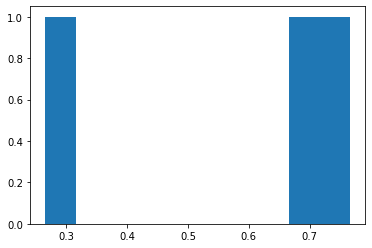

In [231]:
plt.hist(score['LogisticRegression'])